**Import library need by the project**

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

**Read data from CSV and display the summary**

In [3]:
wines = pd.read_csv('wine_data.csv', sep=',')

wines.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3
5,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3
6,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3
7,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3
8,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3
9,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3


In [4]:
wines.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,9.797079,0.774796,0.793870,31.289348,0.200245,129.442333,229.008762,1.009972,3.158712,1.020641,11.291716,6.000000
std,2.413919,0.365015,0.384833,19.015391,0.124933,77.167262,100.183265,0.012032,0.171371,0.408304,1.182198,2.000048
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,7.600000,0.430000,0.410000,9.800000,0.072000,45.000000,150.000000,0.997417,3.030000,0.620000,10.400000,4.000000
50%,10.000000,0.830000,0.870000,37.600000,0.205000,145.800000,240.500000,1.012200,3.150000,1.080000,11.300000,6.000000
75%,11.800000,1.080000,1.110000,46.800000,0.298000,194.325000,311.625000,1.019840,3.270000,1.360000,12.200000,8.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


**Observe the variable type. quality could be decrete variable and rest variable could be continuous **

In [5]:
for i, col in enumerate(list(wines.columns.values)):
    print("Column name: {}, type: {}".format(col, wines[col].dtype))

Column name: fixed_acidity, type: float64
Column name: volatile_acidity, type: float64
Column name: citric_acid, type: float64
Column name: residual_sugar, type: float64
Column name: chlorides, type: float64
Column name: free_sulfur_dioxide, type: float64
Column name: total_sulfur_dioxide, type: float64
Column name: density, type: float64
Column name: pH, type: float64
Column name: sulphates, type: float64
Column name: alcohol, type: float64
Column name: quality, type: int64


**We do not want to have empty data, so check if any column misses data**

In [6]:
wines.isnull().any().any()

False

**Based on the histogram, quality is from 3 to 9 and we have 3000 records for each quality level**

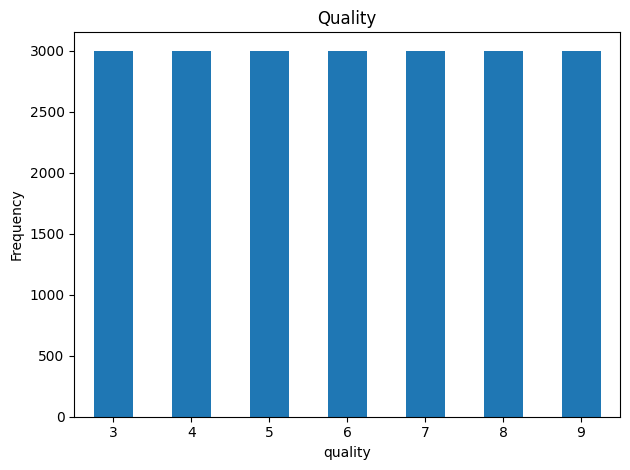

In [7]:
wines['quality'].value_counts().plot(kind='bar', title = 'Quality') 

plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Heatmap to help us to understand correlation. From here, we can understand alcohol is important for quality. The correlation between quality and pH is -0.0024 and some of variables have correlation less than 0.05. We can consider build model without those variable which are less than 0.05.**

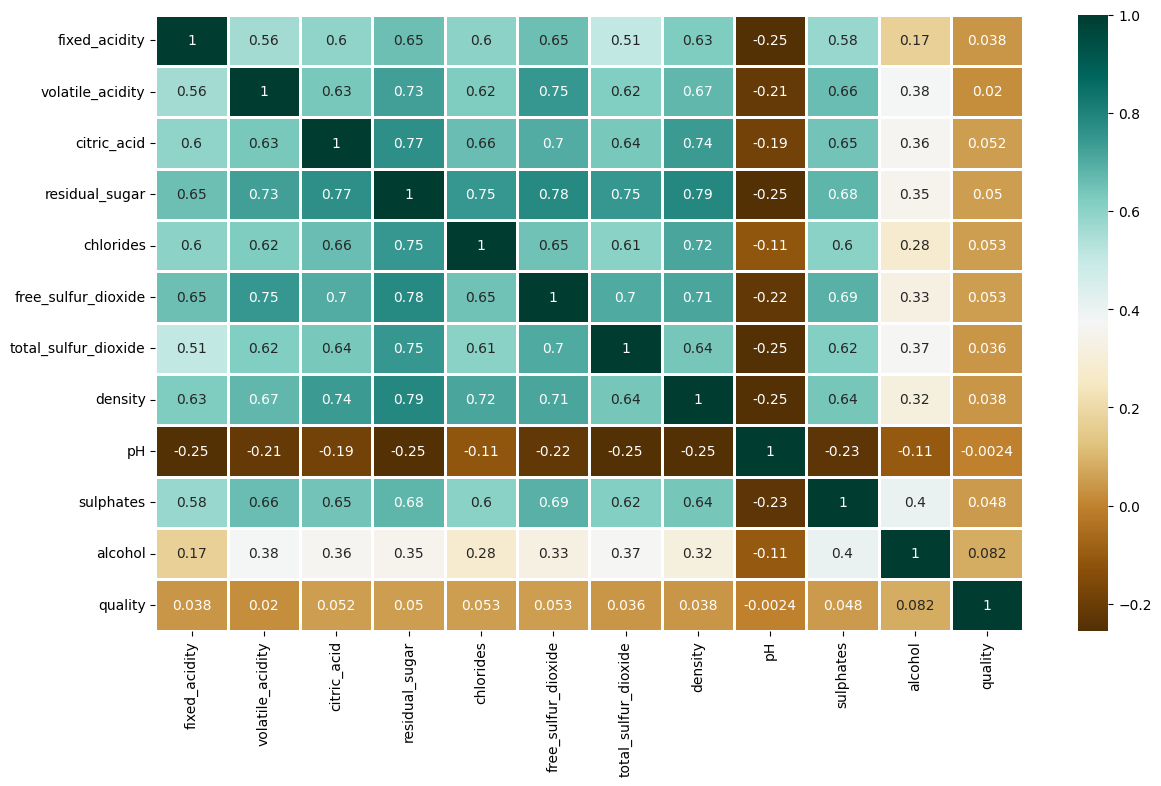

In [8]:
plt.figure(figsize=(14, 8))
sns.heatmap(wines.corr(), cmap = 'BrBG', linewidths = 2, annot = True)
plt.show()

**We want to observe features if any one is much skewed since skewness could affect model prediction**

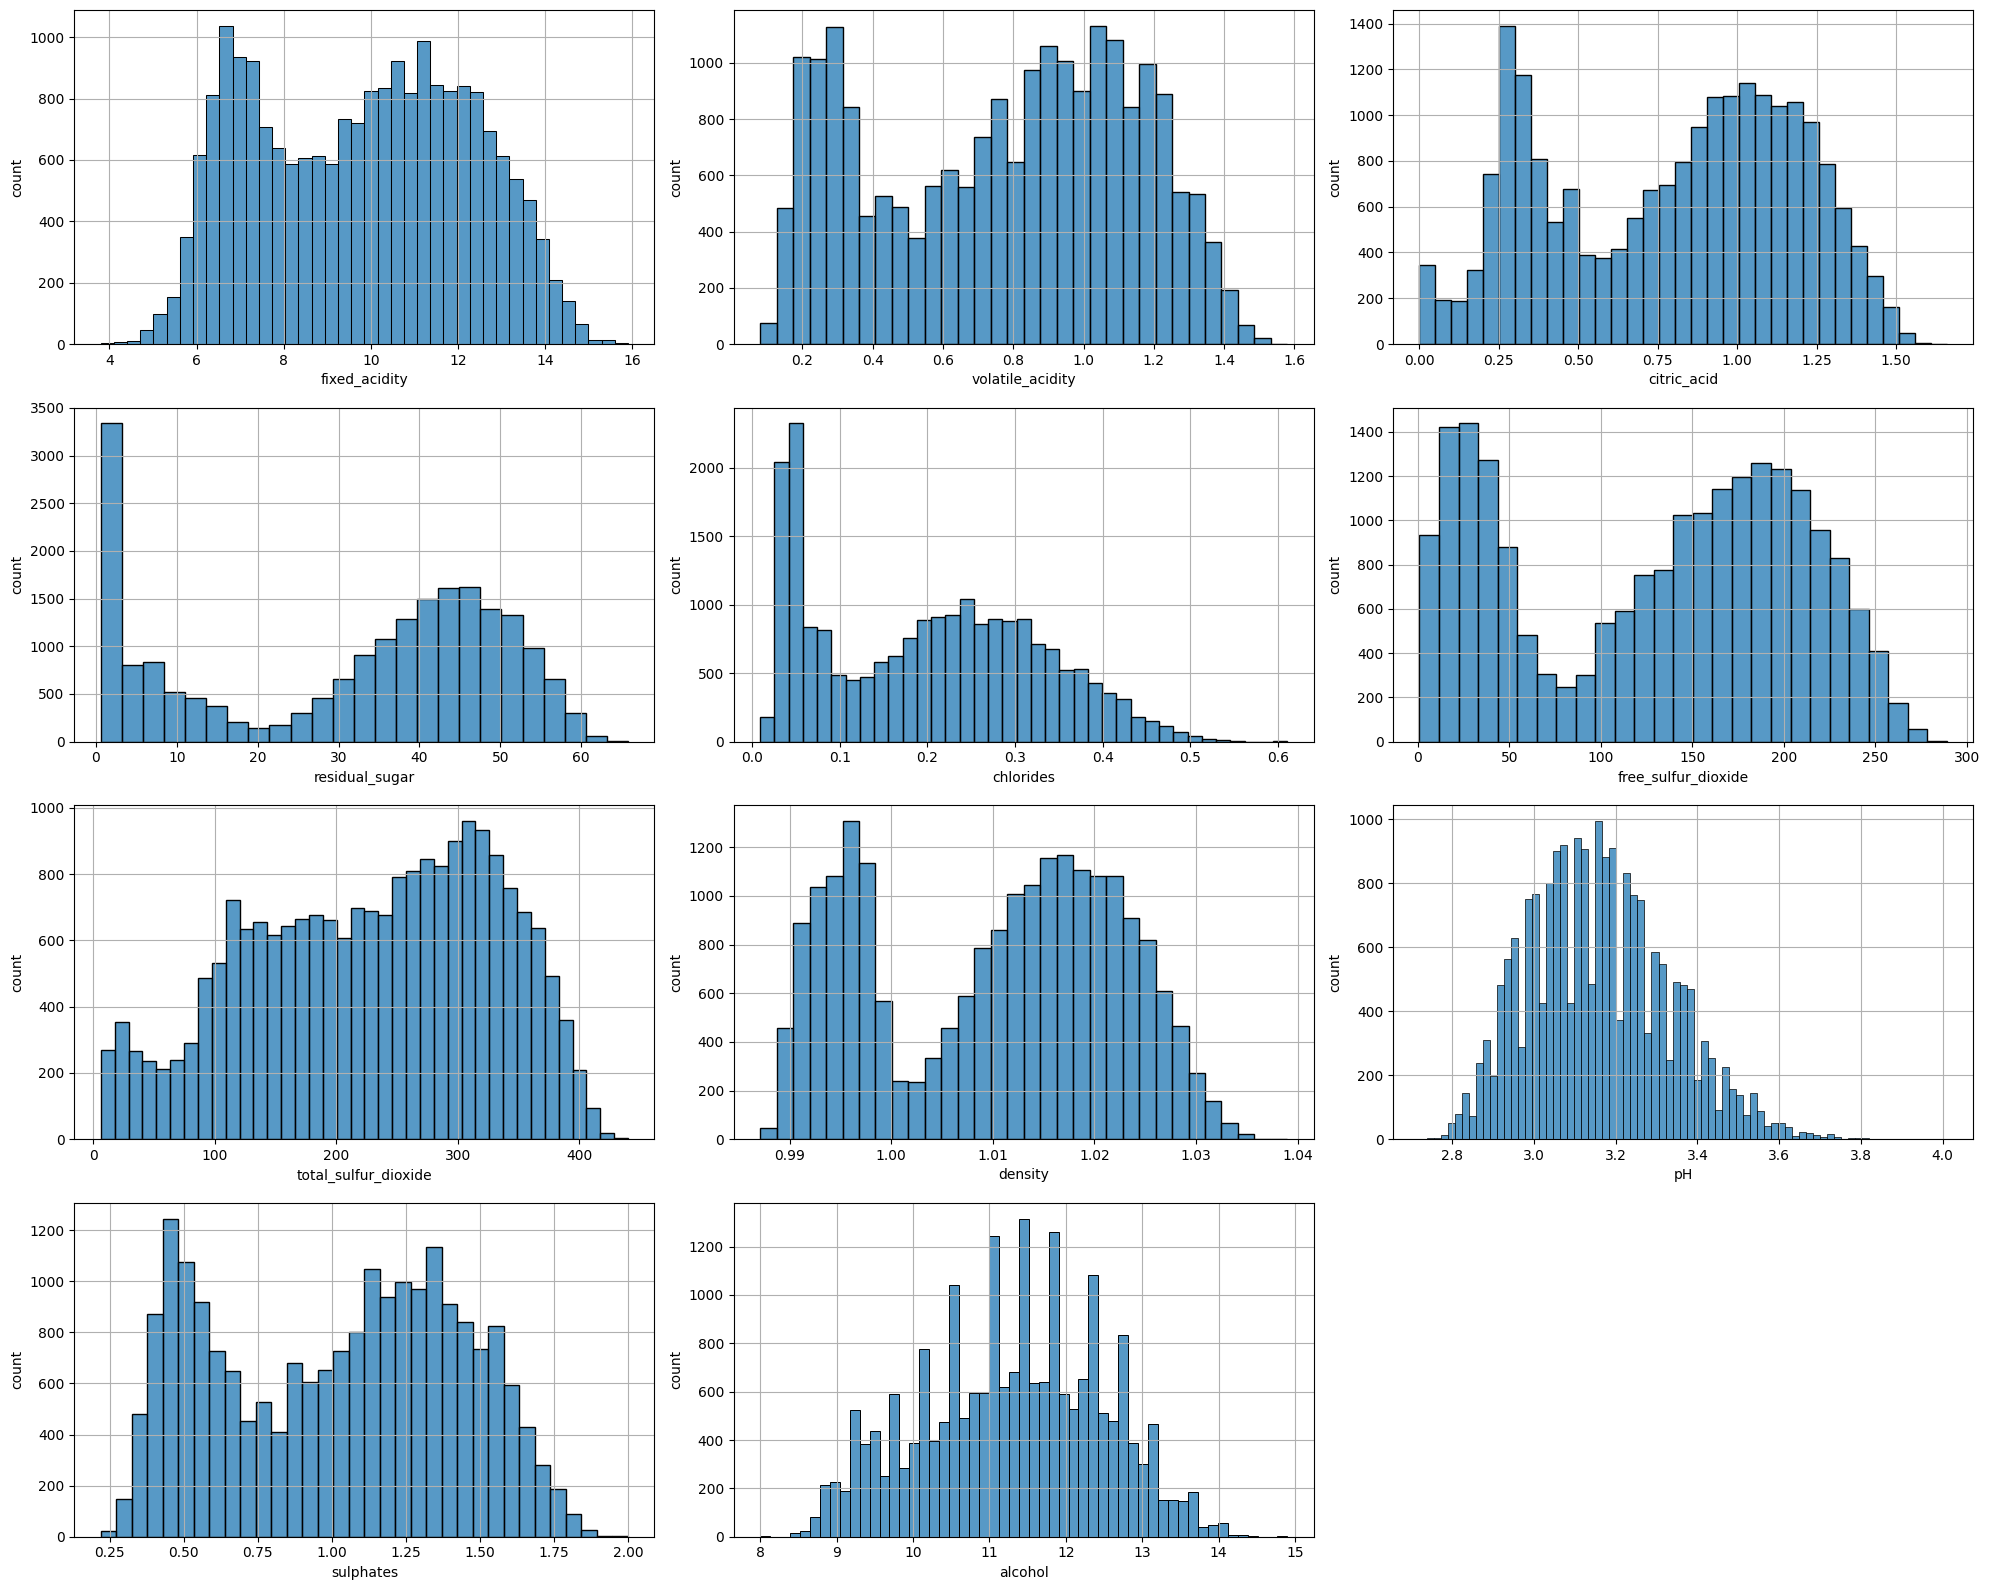

In [9]:
features = wines.drop(columns=['quality'], errors='ignore')

plt.figure(figsize = (20, 16))
for i, col in enumerate(list(features.columns.values)):
    plt.subplot(4, 3, i + 1)
    sns.histplot(data = features[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.grid()
    plt.tight_layout()

plt.show()

**KDE to show the probability curve so we can observe the distribution of each feature**

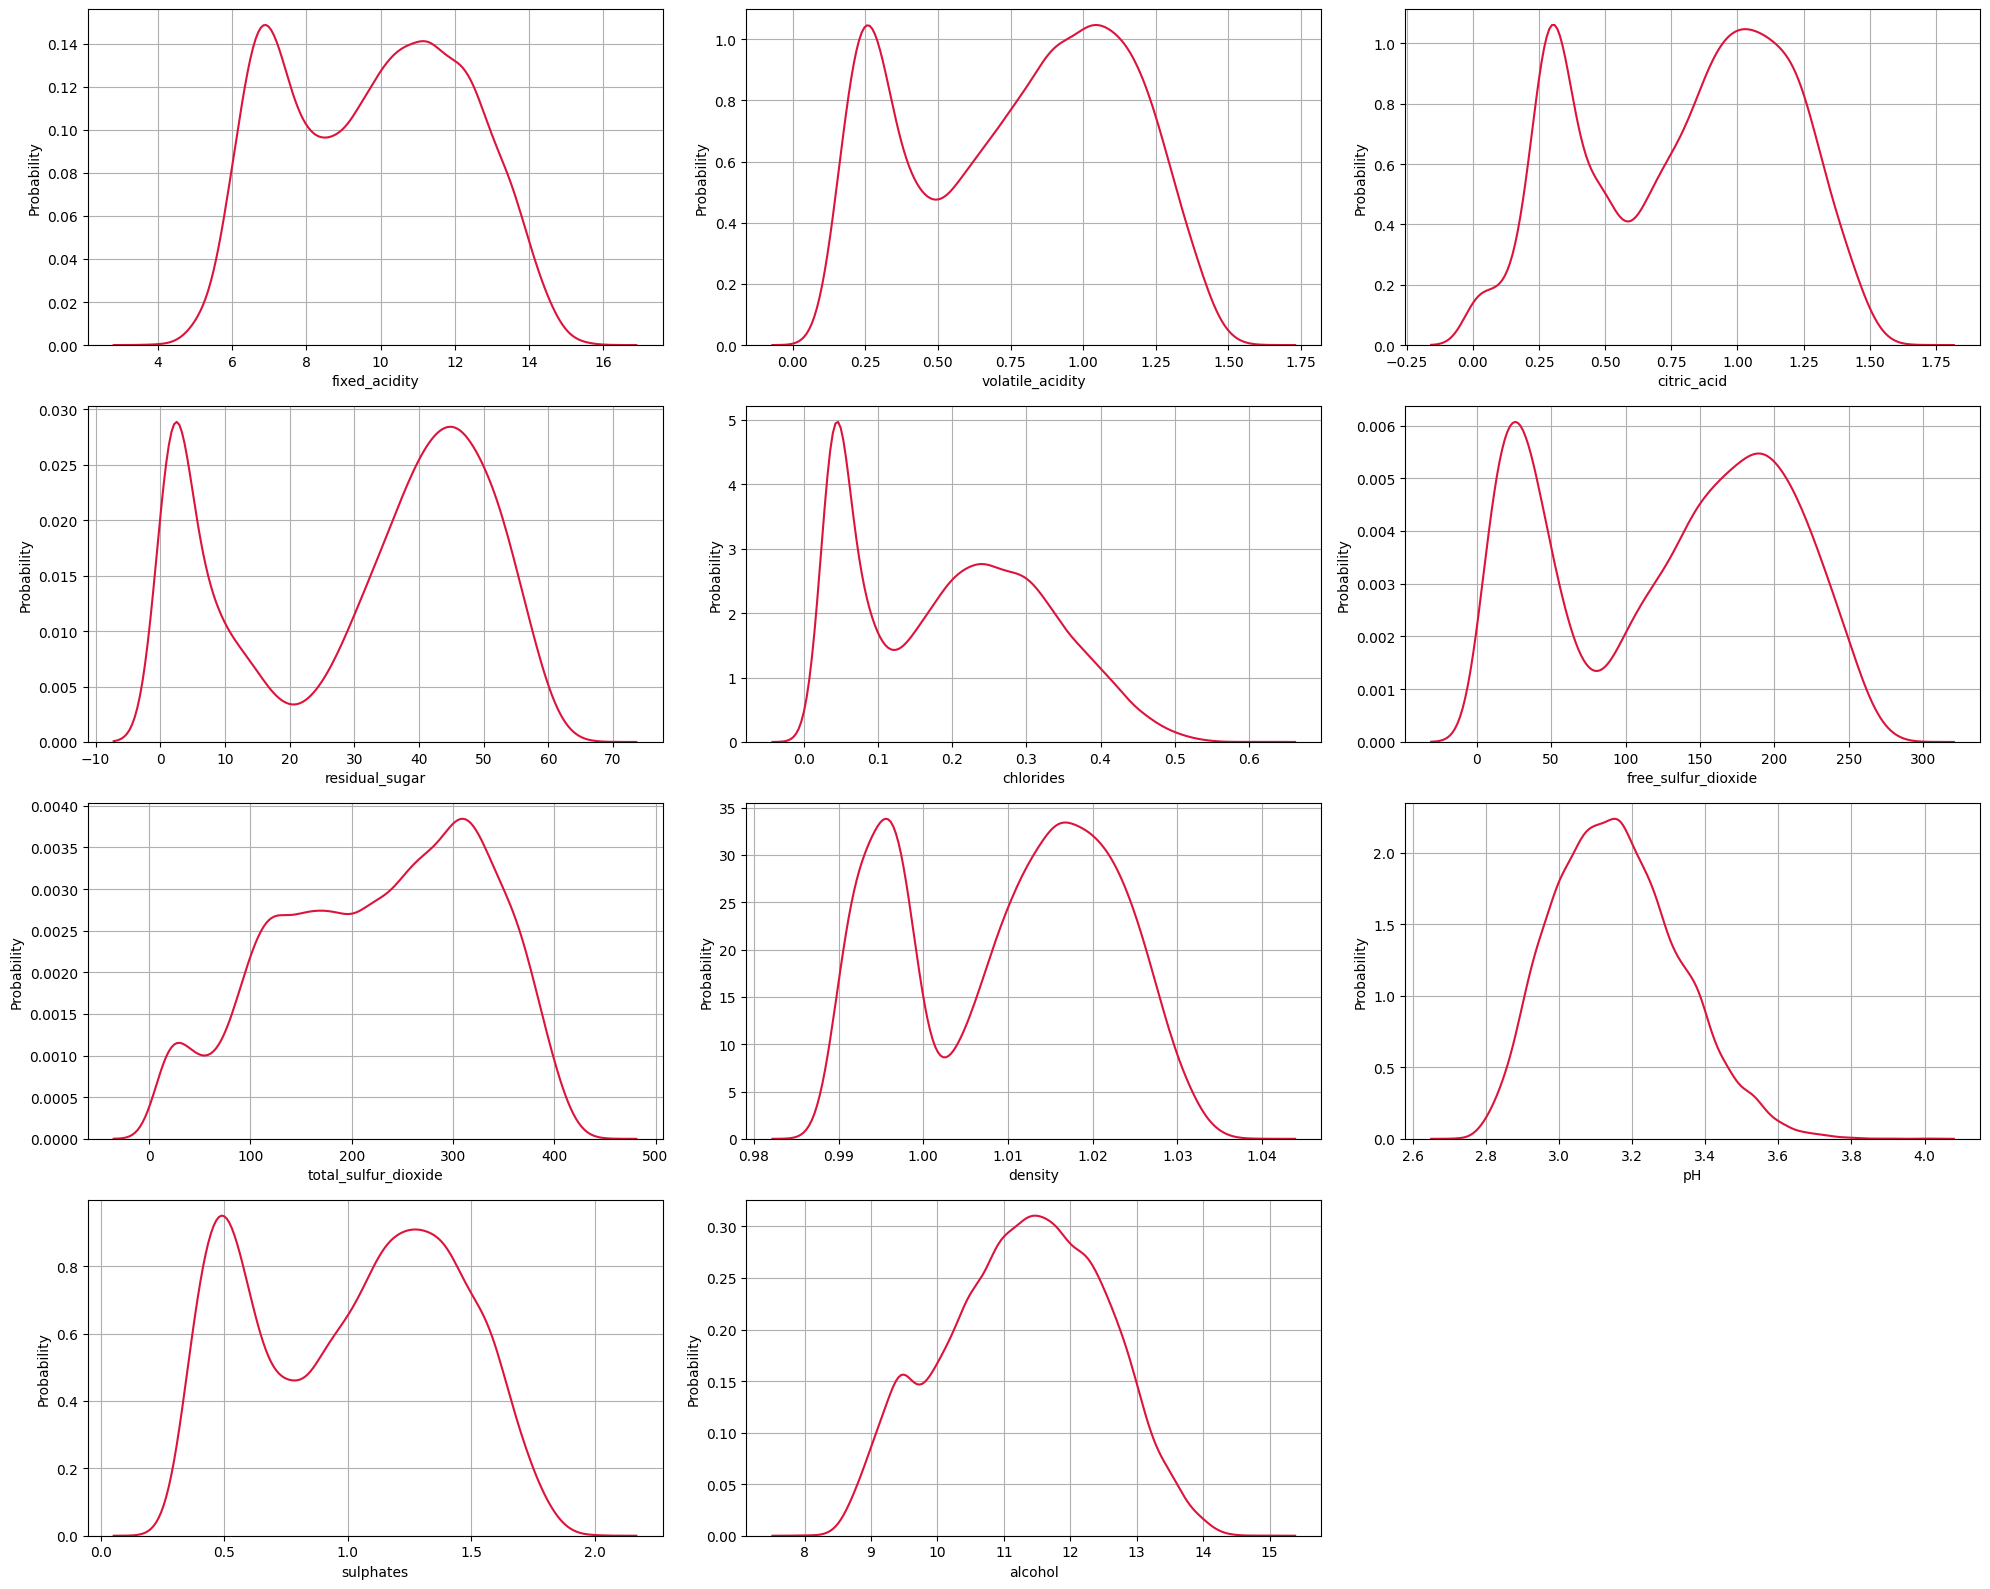

In [10]:
plt.figure(figsize = (20, 16))
for i, col in enumerate(list(features.columns.values)):
    plt.subplot(4, 3, i + 1)
    sns.kdeplot(data = features[col], color = 'crimson')
    plt.xlabel(col)
    plt.ylabel('Probability')
    plt.grid()
    plt.tight_layout()

plt.show()

**We use scatterplot to find if there has outliers that we need to remove**

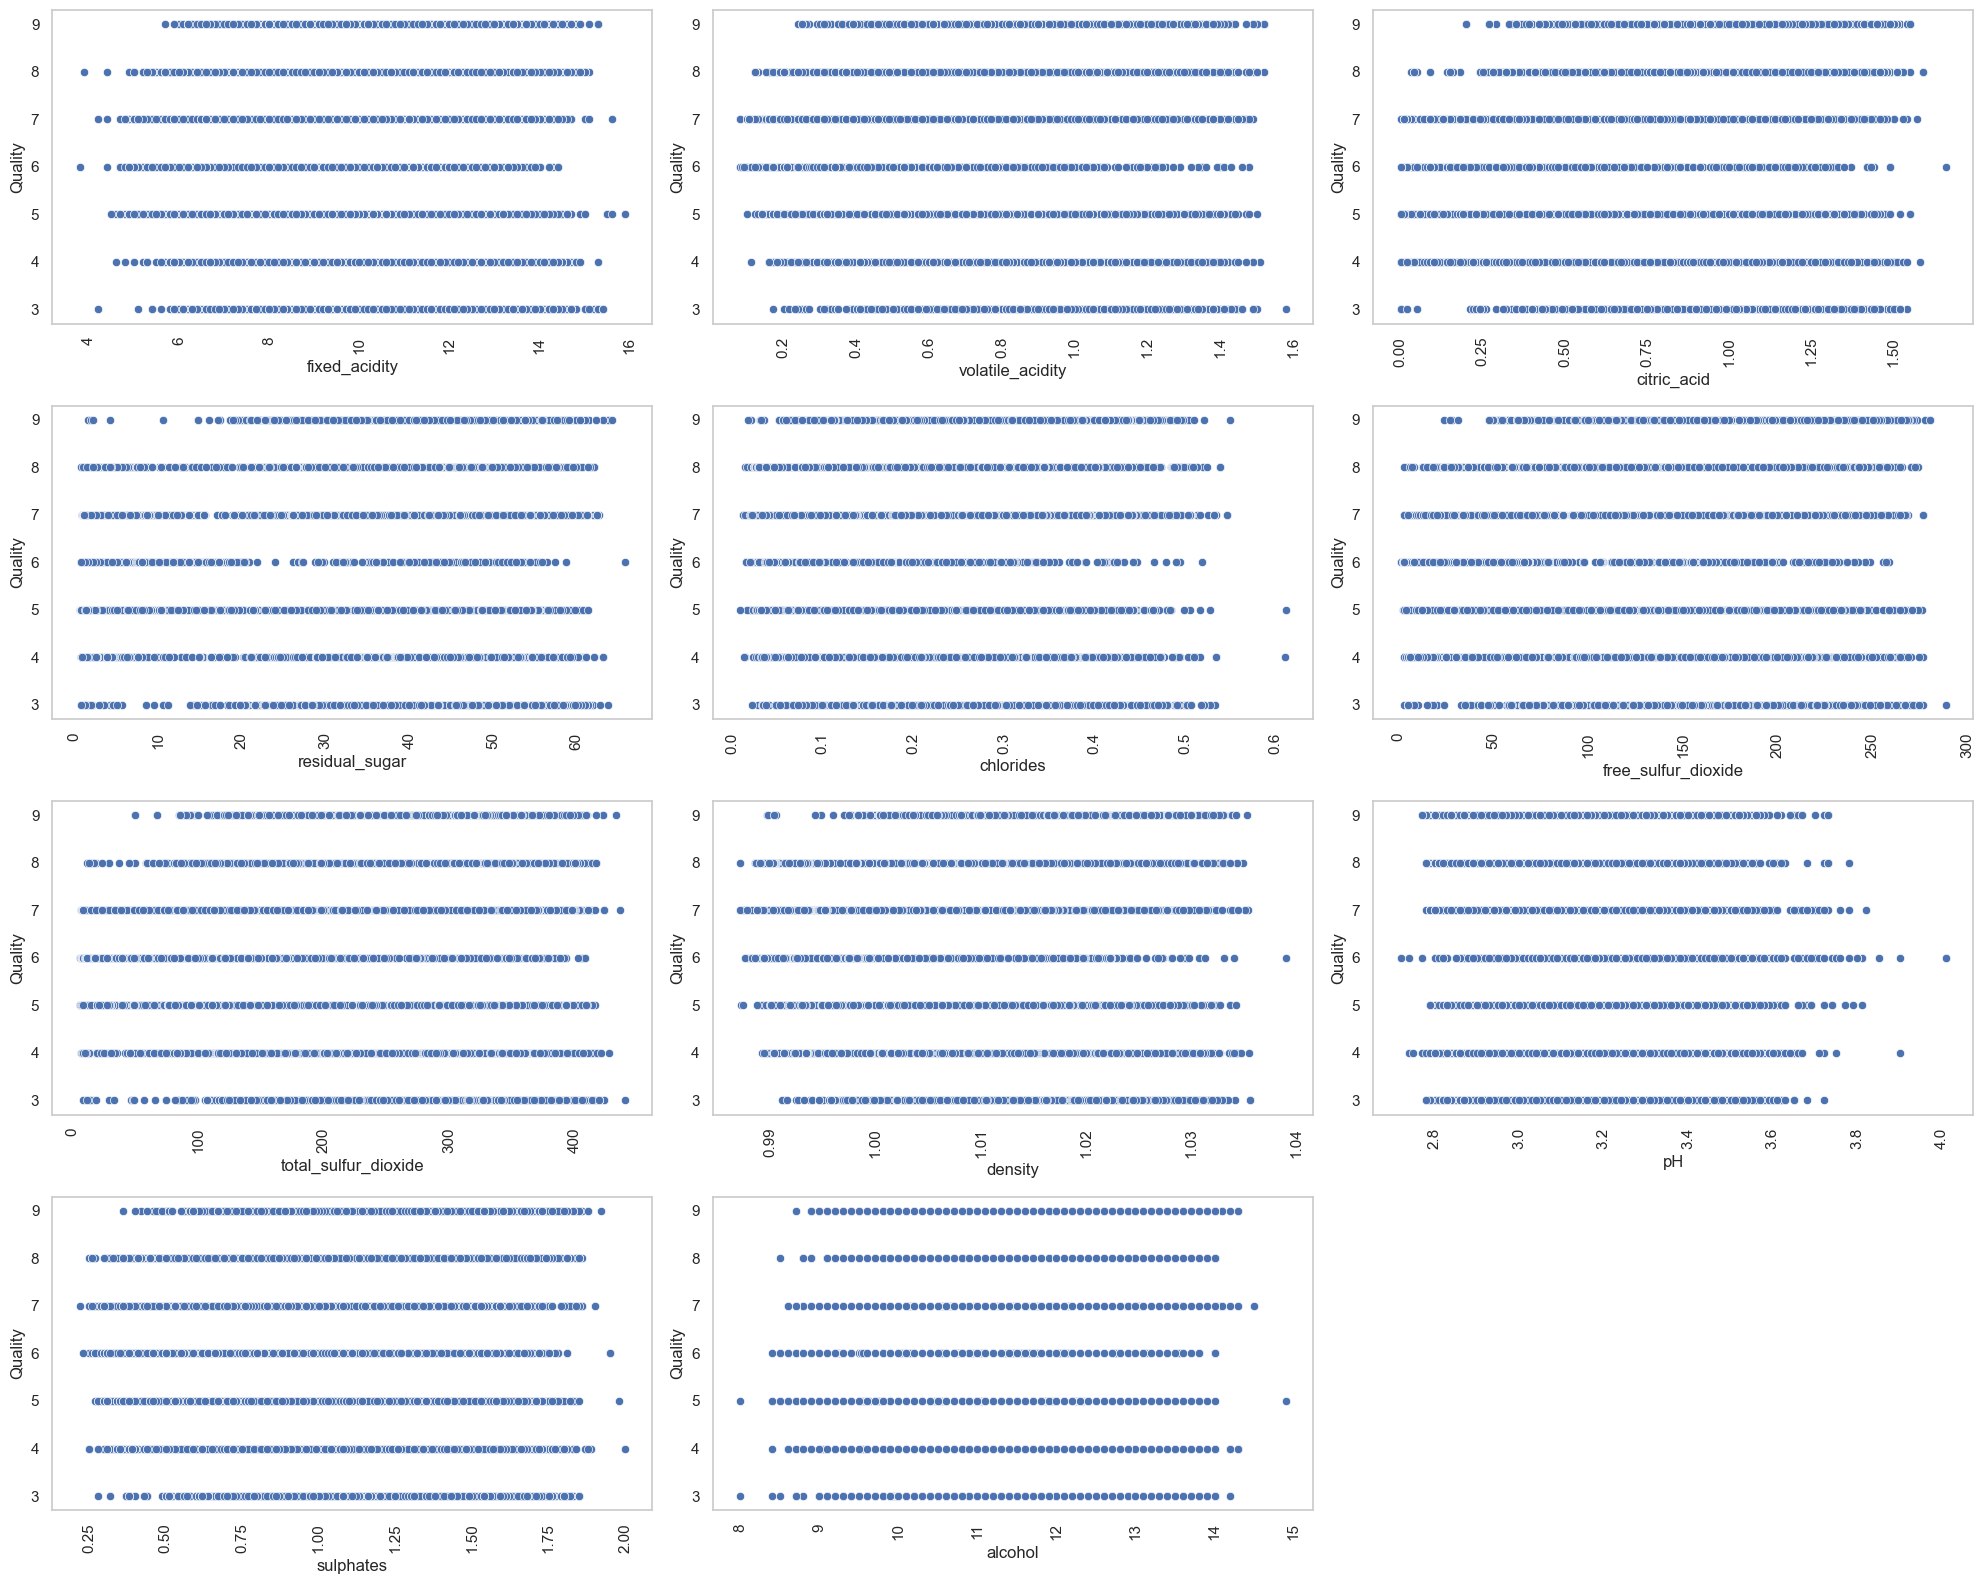

In [11]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (20, 16))
for i, col in enumerate(list(features.columns.values)):
    plt.subplot(4, 3, i + 1)
    sns.scatterplot(x = wines[col], y = wines['quality'], data = wines)
    plt.xlabel(col)
    plt.ylabel('Quality')
    plt.xticks(rotation=90)
    plt.grid()
    plt.tight_layout()

plt.show()

**Create smaller dataset for comparison. We only keep the variables have more than 0.04 correlation with quality**

In [13]:
wines_small = wines.drop(['fixed_acidity', 'volatile_acidity', 'total_sulfur_dioxide', 'density', 'pH'], axis = 1)
wines_small.head()

,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,sulphates,alcohol,quality
0,0.66,2.20,0.074,10.0,0.57,9.0,3
1,0.49,2.10,0.200,5.0,0.63,8.4,3
2,0.00,4.25,0.097,5.0,0.54,10.7,3
3,0.42,1.50,0.145,34.0,0.86,9.9,3
4,0.02,3.40,0.084,6.0,0.49,11.0,3


**Shuffle data and split dataset to independent data and target data**

In [65]:
wines = wines.sample(frac=1).reset_index(drop=True)
x = wines.drop(['quality'], axis = 1)
y = wines.filter(['quality'], axis = 1)
print(x.head())
print()
print(y.head())


   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.1              0.18         0.39            14.5      0.051   
1            7.7              1.12         1.47            35.1      0.168   
2            7.8              1.16         1.30            51.3      0.369   
3           12.8              0.75         0.92            34.7      0.185   
4           12.0              0.83         1.34            33.9      0.221   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 48.0                 156.0  0.99947  3.35       0.78   
1                227.2                 226.4  1.01353  3.09       1.49   
2                222.8                 327.1  1.01556  2.99       1.17   
3                245.3                 224.1  1.01933  3.25       1.30   
4                248.4                 211.6  1.02652  3.24       1.34   

   alcohol  
0      9.1  
1     13.4  
2     12.0  
3     11.9  
4     10.0  

   qual

In [66]:
wines_small = wines_small.sample(frac=1).reset_index(drop=True)
small_x = wines_small.drop(['quality'], axis = 1)
small_y = wines_small.filter(['quality'], axis = 1)

print(small_x.head())
print()
print(small_y.head())

   citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  sulphates  \
0         0.21             8.2      0.050                 51.0       0.48   
1         0.60            32.7      0.229                145.4       1.42   
2         1.44            38.2      0.249                167.5       1.53   
3         0.74            47.9      0.271                152.8       1.41   
4         0.99            50.5      0.257                167.0       1.20   

   alcohol  
0      9.5  
1     12.8  
2     12.4  
3     11.0  
4     12.7  

   quality
0        5
1        8
2        9
3        9
4        7


**Splitting the dataset into 80% training and 20% testing**

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 0)

print("Shape of x_train: {}".format(x_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))


Shape of x_train: (16800, 11)
Shape of x_test: (4200, 11)
Shape of y_train: (16800, 1)
Shape of y_test: (4200, 1)


In [64]:
small_x_train, small_x_test, small_y_train, small_y_test = train_test_split(small_x, small_y, train_size = 0.8, test_size = 0.2, random_state = 0)

print("Shape of small_x_train: {}".format(small_x_train.shape))
print("Shape of small_x_test: {}".format(small_x_test.shape))
print("Shape of small_y_train: {}".format(small_y_train.shape))
print("Shape of small_y_test: {}".format(small_y_test.shape))

Shape of small_x_train: (16800, 6)
Shape of small_x_test: (4200, 6)
Shape of small_y_train: (16800, 1)
Shape of small_y_test: (4200, 1)
